# Mathematical Programming Project: Aliquot Sequences

#### By: Cristina Poncela Cubeiro.

## Table of Contents

#### [Introduction](#intro)

Core Questions:
1. [The Sum of Proper Divisors](#The-Sum-of-Proper-Divisors)

2. [Generating Aliquot Sequences](#Generating-Aliquot-Sequences)

3. [Detecting Loops](#Detecting-Loops)

4. [Classifying Aliquot Sequences](#4)

5. [Classifying Aliquot Sequences More Efficiently](#5)

Core Extensions:
1. [Loop Lengths](#CE1)

2. [Lengths of Terminating Sequences](#CE2)

Extensions:

3. [Plotting Aliquot Sequences](#E3)

4. [Perfect, Amicable, Adbundant and Deficient Numbers](#E4)

    A. [Perfect Numbers](#perf)
    
    B. [Amicable Numbers](#amic)
    
    C. [Abundant and Deficient Numbers: Ratio Amongst the Integers](#abdef)
    
    D. [Abundant and Deficient Numbers: Existence](#ex)
    
    E. [Abundant and Deficient Numbers: Looping Aliquot Sequences](#loop)
    
    F. [Abundant and Deficient Numbers: General Aliquot Sequences](#gen)

5. [The Preimage](#E5)

#### [Conclusion](#conc)

#### Introduction <a class="anchor" id="intro"></a>

For a positive integer n the sum of proper divisors function is
$s(n) = \sum_{\substack{d|n \\ d \neq n}} d$.

It gives the sum of all positive divisors of n, excluding n. Interest in this function goes
back to the Pythagoreans (6th century B.C.E.). Aliquot sequences are the seqeunces formed by
repeatedly applying this function.

Definition: For each n ∈ N the sequence
$A_n = \{n, s(n), s^2(n), s^3(n),...\}$
generated by applying the function s repeatedly is the Aliquot Sequence starting at n. If $s^j(n) = 0$
for some j, the sequence terminates after j.

There are some interesting seqeunces. For example, $s(220) = 284$ and $s(284) = 220$. This
means $\{220, 284, 220, 284, 220, . . .\}$ is an infinitely looping aliquot sequence. These are called
‘amicable’ numbers. 

Other examples arise from ‘perfect’ numbers such as 6 which has the
property that $s(6) = 6$. 

There are also sequences which terminate at 0, such as $\{7, 1, 0\}$. The
same should happen starting at any prime.

Surprisingly little is known about aliquot sequences. It is easy to see that there are three
possible types of aliquot sequences:
1. Those which terminate at zero.
2. Those which enter a loop.
3. Those which continue infinitely but do not contain repeats.

It is not currently known whether there are any of type 3 but equally it is possible that most
aliquot sequences are of this type. The goal of this project is explore these sequences computationally.
One of the difficulties is that calculating s(n) becomes computationally difficult once n is
large because it involves factoring n into primes. 

In this project, we will aim to:

• Write code to compute some aliquot sequences.

• Use this code to explore questions about these sequences.

##### Remark:
We will define perfect numbers to be a subset of numbers that enter loops, i.e. loops of length 1 still count as loops. This will have implications later on, and would paint a very different picture and ratios if we assumed differently.

In [1]:
# First, run this cell to import the necessary modules
import numpy as np 
import matplotlib.pyplot as plt
import timeit
import random


def isprime_basic(n,verbose=False): 
    '''
    Checks whether the argument n is a prime number using a brute force 
    search for factors between 1 and n. We made it verbose here for 
    illustration. (I.e. it prints out its results.)
    '''
    # First, 1 is not prime.
    if n == 1:
        return False
    # If n is even then it is only prime if it is 2
    if n % 2 == 0: 
        if n == 2: 
            return True
        else:
            if verbose:
                print("{} is not prime: {} is a factor. ".format(n,2))
            return False
    # So now we can consider odd numbers only. 
    j = 3
    rootN = n**0.5
    # Now check all numbers 3,5,... up to sqrt(n)
    while j <= rootN: 
        if n % j == 0:
            if verbose:
                print("{} is not prime: {} is a factor.".format(n,j))
            return False
        j = j + 2
    if verbose:
        print("{} is prime.".format(n))
    return True 

def smallest_factor(n):
    """Returns the smallest factor of a positive integer n."""
    sqrt=n**0.5
    i=2
    while i<=sqrt:
        if n%i==0:
            return i                            #If we get here, return i as the value.
        i+=1
    return n                                    #If we get through the whole while loop, return n.

def decompose(n):
    """Generates a dictionary representing the prime decomposition."""
    factors={}
    current_number=n                            #divide current_number by the factor found found until it reaches 1
    while current_number > 1:
        p=smallest_factor(current_number)
        if p in factors.keys():                 #if p is not a new factor, increase the power
            factors[p]+=1
        else:
            factors[p]=1                        #if p is a new factor, create a new entry
        current_number = current_number//p
    return factors

## Question 1: The Sum of Proper Divisors <a class="anchor" id="The-Sum-of-Proper-Divisors"></a>

**(Core)** Write a function to calculate $s(n)$. (Note: In week 9 we’ll see a method that
exploits the fact that the sum of all divisors is a multiplicative function.)

In [2]:
def slower_s(n):
    """
    Given a number n, this function computes s(n), the sum of the proper divisors of n.
    """
# Almost directly adapted from the 'factor_list' function below.
    nn=decompose(n)
    divisors=[1]
    for p in nn.keys():
        #This is a list of divisors of p^n.
        p_div=[p**i for i in range(1,nn[p]+1)]
        newdivisors=[]
        #So for each divisor we already have, multiply by each power of p to get new ones.
        for pp in p_div:
            newdivisors+=[pp*i for i in divisors]
        divisors+=newdivisors
    s=0
    for ss in divisors:
        s+=ss
    # deal with special value
    if n not in (0,1):
        return s-n
    return "Undefined"

In [3]:
print(slower_s(6))
print(slower_s(220))
print(slower_s(284))
print(slower_s(0))
print('\n')


6
284
220
Undefined




## Question 2: Generating Aliquot Sequences <a class="anchor" id="Generating-Aliquot-Sequences"></a>

**(Core)** For a given $k$, compute the aliquot sequence starting at $k$ (up to a sensible point).\
**Practical suggestion:** Write your code so that it computes at most the first $n$ terms of the sequence. Also, write it so that for some $i$, your code stops computing new terms once $s^j(k) > i$. At first, you can use lower values but you should aim to get code that runs in a reasonable time for $n$ = 30 and $i$ = $10^9$.

In [4]:
def aliquot_sequence1(n,m=30, i=1e9):
    """
    Given a number n, this function computes the first mth terms in its Aliquot Sequence.
    Note: 'm' represents length of the Aliquot Sequence returned.
    Normally, we use m<=30.
    """
    sequence=[n]
    for j in range(m-1): # not m since sequence already contains the first term n
        nn=slower_s(sequence[j])
        if nn == "Undefined":
            sequence.append(0)  # we first check the case for n=0, with s(0) = Undefined
            return sequence
        elif nn>i:  # if a term of the sequence exceeds input i, we stop generating terms and return the shortened sequence
            return sequence
        #elif nn == sequence[j]:
            #return sequence
# we could include the lines above to ensure sequences stop once they reach a term that will repeat
# however, we comment them out so that graphs in further questions are more clear and easy to read
        else:
            sequence.append(nn) # otherwise we append s(n) in a loop
    return sequence

In [5]:
aliquot_sequence1(6, 10)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [6]:
print(aliquot_sequence1(220))

[220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284]


In [7]:
print(aliquot_sequence1(220, 30, 250))

[220]


In [8]:
aliquot_sequence1(25, 10)

[25, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [9]:
print(aliquot_sequence1(72))

[72, 123, 45, 33, 15, 9, 4, 3, 1, 0]


In [10]:
print(aliquot_sequence1(138, 30, 1e6))
print(len(aliquot_sequence1(138, 30, 1e6)))

[138, 150, 222, 234, 312, 528, 960, 2088, 3762, 5598, 6570, 10746, 13254, 13830, 19434, 20886, 21606, 25098, 26742, 26754, 40446, 63234, 77406, 110754, 171486, 253458, 295740, 647748]
28


In [11]:
print(len(aliquot_sequence1(220,30)))

print(aliquot_sequence1(220,30))

print(aliquot_sequence1(284,30))

print(aliquot_sequence1(562,30))

print(aliquot_sequence1(400,5))


30
[220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284]
[284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220]
[562, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284]
[400, 561, 303, 105, 87]


## Question 3: Detecting Loops <a class="anchor" id="Detecting-Loops"></a>

**(Core)** Find a way to detect loops. (There's a little bit to this - look at the sequence starting at 562 to see why.) 

We found 2 ways to do this: check whether a term repeats, or compare the size of the set to the length of the sequence. We kept both functions to test their running time, and indeed the second is more efficient.

In [12]:
def detect_loop(n,m=30,i=1e9):
    """
    Given n, checks whether its Aliquot Sequence enters a loop (returns True)
    or not (returns False) by checking whether terms are repeated within the first m terms.
    """
# The meaning is, firstly use 'n' and 'm' to form an aliquot sequence, and then detect whether there's a loop
    u=aliquot_sequence1(n,m)
    for i in range(1,len(u)):  # we check whether a term is repeated in the Aliquot Sequence
        for j in range(i-1):
            if u[i]==u[j]:
                return True  # if so, return True, otherwise return False
    return False

In [13]:
# A more easy version of detect_loop(n,m)
def seq_detect_loop1(n, m=30, i=1e9):
    """
    Given an n, this function detects whether its Aliquot Sequence 
    reaches a loop within its first m terms (and exceeds i).
    It returns True if it does, and False if it doesn't.
    """
    ali_seq = aliquot_sequence1(n, m, i)
    if len(set(ali_seq)) == len(ali_seq):  # more efficient- checks whether the size of the set
        return False                       # and sequence are the same; if not a term must be repeated, so loop
    elif ali_seq[-1] == 0:  # but if loop entered is at 0, we exclude this, so we check that the last term is not 0
        return False
    return True

In [14]:
print("Time to calculate detect_loop(19977):")
%timeit detect_loop(19977)
print("Time to calculate seq_detect_loop1(19977):")
%timeit seq_detect_loop1(19977)

Time to calculate detect_loop(19977):
97.7 µs ± 581 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Time to calculate seq_detect_loop1(19977):
94.3 µs ± 863 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Though the time difference is not too considerable, the new function has to check less values and is more efficient, both in terms of time and space.

In [19]:
print(aliquot_sequence1(562))

[562, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284]


In [20]:
print(seq_detect_loop1(220))

print(seq_detect_loop1(562))

True
True


In [21]:
print(seq_detect_loop1(72))
print(aliquot_sequence1(72))

False
[72, 123, 45, 33, 15, 9, 4, 3, 1, 0]


## Question 4: Classifying Aliquot Sequences <a class="anchor" id="4"></a>

**(Core)** For each $k$ < 20000 try to classify it according to the end state of the aliquot sequence starting at k. It should either terminate at zero, enter a loop or be unknown (you might want to distinguish between the cases where the calculation was cut short because you reached term $n$ and those where the sequece exceeded $i$).

In [22]:
def classify_ali_seq_4(k,m=30,i=1e9):
    """
    For the first k Aliquot Sequences, this function classifies 
    them into those which, within the first m terms:
    1) Enter a loop.
    2) Terminate at 0.
    3) Exceed input number i and never repeat.
    4) Have done none of the above when they reach term m
        (i.e. are likely to have been "cut short").
    It returns the labelled list for each category.
    """
    loop = []
    terminated = []    
    exceeded = []
    reached_term = []
    for j in range(1,k+1):  # first k numbers
        u = aliquot_sequence1(j,m,i)
        if seq_detect_loop1(j) == True:  # use previous function to detect loops
            loop.append(j)
        elif u[-1] == 0:  # check whether terminates at 0 by checking the last term
            terminated.append(j)
        elif len(u) != m:  # if sequence is cut short, either exceeds i 
                           # or terminates at 0, but this comes after 0's if statement
            exceeded.append(j)
        else:
            reached_term.append(j)  # otherwise, appended to the undecided category
    return f'Numbers that enter a loop: {loop} \n\nNumbers that terminated at 0: {terminated} \n\nNumbers that exceeded i: {exceeded} \n\nNumbers that reached term m, the input: {reached_term}'


In [23]:
print(classify_ali_seq_4(200))

Numbers that enter a loop: [6, 25, 28, 95, 119, 143] 

Numbers that terminated at 0: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200] 

Numbers that exceeded i: [] 

Numbers that reached term m, the in

In [20]:
print(aliquot_sequence1(28, 30))
print(aliquot_sequence1(119, 30))

[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
[119, 25, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [21]:
print(aliquot_sequence1(138, 30))
print(len(aliquot_sequence1(138)))

[138, 150, 222, 234, 312, 528, 960, 2088, 3762, 5598, 6570, 10746, 13254, 13830, 19434, 20886, 21606, 25098, 26742, 26754, 40446, 63234, 77406, 110754, 171486, 253458, 295740, 647748, 1077612, 1467588]
30


In [22]:
print(aliquot_sequence1(136, 30))

[136, 134, 70, 74, 40, 50, 43, 1, 0]


## Question 5: Classifying Aliquot Sequences More Efficiently <a class="anchor" id="5"></a>

**(Core)** If your code takes too long to do (4) for this range for $k$ revisit steps (1) and (2).

We redefine the functions s(n), aliquot_sequence(n,m,i), and seq_detect_loop(n,m,i):
We will use the memory to store values so the functions call them and run faster. 
We keep the old versions of the functions to compare running time and conclude whether our new functions are indeed more efficient, even though this does take up more space.

We now also modify the function to be able to print the classified lists as well as allowing us to pick a certain category and produce only that list, so that we can use this later.

In [23]:
MEMO={}  # we introduce the use of memory, as a dictionary to keep track of the corresponding inputs in the form n:s(n)
def s(n):
    """
    Given a number n, this function computes s(n), the sum of the proper divisors of n.
    """
    if n in MEMO:
        return MEMO[n]
    else:
        MEMO[n]=slower_s(n)
        return slower_s(n)
        

In [24]:
def aliquot_sequence(n,m=30, i=1e9):
    """
    Given a number n, this function computes the first mth terms in its Aliquot Sequence.
    Note: 'm' represents length of the Aliquot Sequence returned.
    Normally, we use m<=30.
    """
    sequence=[n]
    for j in range(m-1):
        nn=s(sequence[j])  # uses new, better function s
        if nn == "Undefined":
            sequence.append(0)
            return sequence
        elif nn>i:
            return sequence
        #elif nn == sequence[j]:
            #return sequence
# we could include the lines above to ensure sequences stop once they reach a term that will repeat
# however, we comment them out so that graphs in further questions are more clear and easy to read
        else:
            sequence.append(nn)
    return sequence

In [25]:
def seq_detect_loop(n, m=30, i=1e9):
    """
    Given an n, this function detects whether its Aliquot Sequence 
    reaches a loop within its first m terms (and exceeds i).
    It returns True if it does, and False if it doesn't.
    """
    ali_seq = aliquot_sequence(n, m, i)  # uses new, better aliquot_sequence function
    if len(set(ali_seq)) == len(ali_seq):
        return False
    elif ali_seq[-1] == 0:
        return False
    return True

In [26]:
def classify_loops(k, m=30, i=1e9):
    """
    For the first k Aliquot Sequences, this function returns a list of the numbers 
    that enter a loop within the first m terms.
    """
    loop_list = []
    for j in range(1,k+1):
        if seq_detect_loop(j) == True:  # uses our previous functions to detect loops
            loop_list.append(j)  # and appends them to a list
    return loop_list

In [27]:
def classify_terminated(k, m=30, i=1e9):
    """
    For the first k Aliquot Sequences, this function returns a list of the numbers 
    that terminate at 0 within the first m terms.
    """
    terminated_list = []
    for j in range(1,k+1):
        u = aliquot_sequence(j,m,i)  # as above, checks the last term is 0 for terminating sequences
        if u[-1] == 0:
            terminated_list.append(j)
    return terminated_list

In [28]:
def classify_exceeded(k, m=30, i=1e9):
    """
    For the first k Aliquot Sequences, this function returns a list of the numbers 
    that exceed input i within the first m terms.
    """
    exceeded_list = []
    for j in range(1,k+1):
        u = aliquot_sequence(j,m,i)
        if len(u) != m and u[-1] != 0:  # again, if the length is not m
            exceeded_list.append(j)     # and doesn't terminate at 0, must have exceeded i
    return exceeded_list

In [29]:
def classify_reached_term(k, m=30, i=1e9):
    """
    For the first k Aliquot Sequences, this function returns a list of the numbers 
    that neither enter a loop, nor terminate at 0, nor exceed input i within the first m terms
    (i.e. are likely to have been "cut short").
    """
    reached_term_list = [j for j in range(1, k+1)]  # all the left over numbers after removing the other categories
    for elt in classify_loops(k, m, i):
        if elt in reached_term_list:
            reached_term_list.remove(elt)
    for elt in classify_terminated(k, m, i):
        if elt in reached_term_list:
            reached_term_list.remove(elt)
    for elt in classify_exceeded(k, m, i):
        if elt in reached_term_list:
            reached_term_list.remove(elt)
    return reached_term_list

In [30]:
def classify_ali_seq_5(k,m=30,i=1e9):
    """
    Similar to classify_aliq_seq_4.
    For the first k Aliquot Sequences, this function classifies 
    them into those which, within the first m terms:
    1) Enter a loop.
    2) Terminate at 0.
    3) Exceed input number i and never repeat.
    4) Have done none of the above when they reach term m
        (i.e. are likely to have been "cut short").
    It returns the labelled list for each category, 
    but it is more efficient because it does so by calling other functions.
    """
    # uses above functions to print lists for each category
    loop = classify_loops(k, m, i)
    terminated = classify_terminated(k, m, i)
    exceeded = classify_exceeded(k, m, i)
    reached_term = classify_reached_term(k, m, i)
    return f"Numbers that enter a loop: {loop} \n\nNumbers that terminated at 0: {terminated} \n\nNumbers that exceeded i: {exceeded} \n\nNumbers that reached term m, the input: {reached_term}"

In [31]:
classify_ali_seq_5(100,m=30,i=1e9)

'Numbers that enter a loop: [6, 25, 28, 95] \n\nNumbers that terminated at 0: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100] \n\nNumbers that exceeded m: [] \n\nNumbers that reached term m, the input: []'

In [32]:
classify_ali_seq_5(20000,m=30,i=1e9)

'Numbers that enter a loop: [6, 25, 28, 95, 119, 143, 220, 284, 417, 445, 496, 562, 565, 608, 650, 652, 675, 685, 783, 790, 909, 913, 1064, 1177, 1184, 1188, 1210, 1235, 1294, 1308, 1336, 1380, 1420, 1441, 1443, 1490, 1574, 1595, 1604, 1633, 1690, 1692, 1715, 1717, 1772, 1778, 1816, 1898, 2008, 2122, 2152, 2162, 2172, 2173, 2195, 2225, 2362, 2387, 2541, 2542, 2581, 2582, 2620, 2630, 2652, 2676, 2678, 2725, 2863, 2924, 2930, 2950, 2974, 3124, 3142, 3162, 3202, 3277, 3278, 3286, 3311, 3332, 3337, 3350, 3528, 3575, 3596, 3693, 3712, 3750, 3850, 3888, 3899, 3938, 3944, 3999, 4118, 4141, 4156, 4180, 4317, 4372, 4404, 4448, 4522, 4535, 4717, 4739, 4763, 4775, 4790, 4840, 4897, 4930, 5020, 5024, 5078, 5150, 5158, 5234, 5243, 5380, 5564, 5603, 5605, 5622, 5630, 5634, 5854, 5855, 5890, 5900, 5942, 5960, 6028, 6036, 6099, 6123, 6145, 6232, 6242, 6280, 6368, 6420, 6532, 6612, 6658, 6663, 6672, 6694, 6808, 6872, 6876, 7006, 7025, 7106, 7120, 7130, 7149, 7180, 7186, 7227, 7294, 7380, 7396, 7403, 74

In [33]:
print("Time taken to compute classify_ali_seq_4(20000,m=30,i=1e9):")
%timeit classify_ali_seq_4(20000,m=30,i=1e9)
print("Time taken to compute classify_ali_seq_5(20000,m=30,i=1e9):")
%timeit classify_ali_seq_5(20000,m=30,i=1e9)

Time taken to compute classify_ali_seq_4(20000,m=30,i=1e9):
6.88 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Time taken to compute classify_ali_seq_5(20000,m=30,i=1e9):
1.11 s ± 26.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Observation
Considerable time difference (around 5 seconds)! 
Implementing the use of the memory did make the code a lot more efficient and free up the kernel, but it is important to note that this is at the cost of using memory. 

Also, note that we do not consider 0 a perfect number. Even though it was tempting at first because it enters a loop of length 1, we decided that, since all natural numbers divide 0 and their sum is greater than 0, it could not be classified as a perfect number.

Some online research confirmed that its Aliquot Sequence is indeed undefined. To make graphs later on more clear, we initially took s(0)=0, so that Aliquot Sequences that terminate at 0 just produce more 0s. However, this produces more output. Also, cutting sequences short once they reach 0 also helped make our code more efficient later on, since it helps to find the term at which sequences reach 0 by simply looking at their length. 

Therefore, we ignored 0 in all future questions, and if computed, s(0) returns "Undefined".

Also, note that those numbers with sequences that exceed i must have terms that never repeat by definition, since otherwise they would enter a loop.

Now we check some of the values printed in each category to check whether the classification is correct:

In [34]:
print(aliquot_sequence(119))

[119, 25, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [35]:
print(aliquot_sequence(138))

[138, 150, 222, 234, 312, 528, 960, 2088, 3762, 5598, 6570, 10746, 13254, 13830, 19434, 20886, 21606, 25098, 26742, 26754, 40446, 63234, 77406, 110754, 171486, 253458, 295740, 647748, 1077612, 1467588]


In [36]:
print(aliquot_sequence(143))

[143, 25, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [37]:
print(aliquot_sequence(150))

[150, 222, 234, 312, 528, 960, 2088, 3762, 5598, 6570, 10746, 13254, 13830, 19434, 20886, 21606, 25098, 26742, 26754, 40446, 63234, 77406, 110754, 171486, 253458, 295740, 647748, 1077612, 1467588, 1956812]


In [38]:
print(aliquot_sequence(840))

[840, 2040, 4440, 9240, 25320, 51000, 117480, 271320, 765480, 1531320, 3721800, 7817640, 15635640, 32899560, 65799480, 139098120, 349027320, 699333000]


Looks good! All values behave as we would expect. 

#### Observation
Note that a vast majority of numbers terminate at 0. This is probably because the sum of divisors tends to be smaller than the input number, and so we would expect most numbers' Aliquot Sequences to tend to 0. 

Also, there is a significant amount of numbers that reach term m with no clear pattern. Note that m here is just 30, so it is hard to tell how the proportion of each category would vary under larger m inputs. One could argue that, if given long enough, these would enter loops. However, from our random checks above, we see that some enter loops and some seem to be increasing.

Some of the limitations of this project are memory, processing speed of our computers and the kernel. If given better resources, we could investigate larger m inputs. However, our prediction is that the proportion would be very similar to the ones we have now if we ignore the last category. Even though many numbers that reached m=30 would probably enter loops or exceed i, there would still be a vast majority of numbers terminating at 0.

# Now we explore some questions about Aliquot sequences:

## Core Extension 1: Lengths of Loops <a class="anchor" id="CE1"></a>

How long can the loop be if an aliquot sequence ends in a loop?

In [39]:
def loop_length(n, m=30, i=1e9):
    """
    Given an n, returns the length of the loop of it Aliquot Sequence,
    or None if there is no loop (for first m terms, if not exceeding i).
    """
    aliq_seq = aliquot_sequence(n,m,i)
    visited = {}
    for j, term in enumerate(aliq_seq):  # if a term is visited twice, must have a loop
        if term in visited:
            return j - visited[term]  # counts how many terms between repeated terms for loop length
        visited[term] = j
    return None

In [40]:
loop_length(6)

1

In [41]:
loop_length(220)

2

In [42]:
def max_loop_length(n, m, i=1e9, loop = False):
    """
    This function finds the biggest loop length within the first m terms of the first n aliquot sequences.
    When set to True, the Boolean variable 'loop' also gives the corresponding aliquot sequence.
    """
    loop = []
    length = []
    for j in range(1, n):
        if seq_detect_loop(j) == True:  # finds loops
            loop.append(j)  # appends numbers whose Aliquot Sequences enter loops
            length.append(loop_length(j))    # creates a list of their lengths to find the max   
    if loop == False:  # only returns max length
        return max(length)
    else:       
        return f'{max(length)}, {aliquot_sequence(loop[length.index(max(length))], m, i)}' # max length and corresponding sequence


In [43]:
max_loop_length(20000, 100, 1e9, True)

'28, [7524, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444]'

In [44]:
print(aliquot_sequence(2856, 100, 1e9))
print(loop_length(2856, 100, 1e9))
print(aliquot_sequence(275444, 100, 1e9))
print(loop_length(275444, 100, 1e9))

[2856, 5784, 8736, 19488, 40992, 84000, 230496, 475356, 792484, 1013852, 1013908, 1058092, 1264340, 2049964, 2123576, 2778664, 3492536, 3077104, 2884816, 3391568, 3775384, 3303476, 3003244, 2288756, 1773484, 1558964, 1440718, 720362, 360184, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704]
28
[275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716, 14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 

## Core Extension 2: Lengths of Terminating Sequences <a class="anchor" id="CE2"></a>

If a sequence terminates at zero, how long can it be (relative to the starting $n$)?

#### Observation
As mentioned in Core Question 5, we initially took s(0)=0, so find_index1 had to be a bit more complex than just checking the length of the sequence to find the first 0.

We then realised this and created find_zero, which is more efficient. Again, we keep both to test their efficiency, but only the new versions are really needed.

In [45]:
def find_index1(aliq_seq, target, loop = False):
    """
    Given an aliquot sequence and a target number, return the index at which the target number is first encountered,
    or None if the target number is not in the sequence.
    We include target as a variable so that we can recall it later if we want to investigate exceeding aliquot sequences.
    """
    for i, item in enumerate(aliq_seq):
        if item == target:  # variable target in case we want to use this to investigate exceeding sequences
            if loop == False:
                return i+1 #i+1 since the ith index is the i+1th term in the sequence
            else:
                return i+1, aliq_seq  # returns the index and corresponding sequence
    return None


In [46]:
print(find_index1(aliquot_sequence(590,30), 0))
print(find_index1(aliquot_sequence(590,30), 0, loop = True))

12
(12, [590, 490, 536, 484, 447, 153, 81, 40, 50, 43, 1, 0])


In [47]:
def find_zero(n, m=30, i=1e9, loop = False):
    """
    Given n, produces the first m terms of its Aliquot Sequence and returns the term index at which 
    it terminates at 0, or None if the sequence does not terminate at 0.
    """
    u=aliquot_sequence(n,m,i)
    if len(u) != m and u[-1] == 0: # either exceeding i or terminating, so we pick terminating
        return len(u)              # by checking the last term
    return None

In [48]:
print(find_zero(1148, 73))

72


In [49]:
print("Time taken to compute find_index1(aliquot_sequence(590,30), 0):")
%timeit find_index1(aliquot_sequence(590,30), 0)
print("Time taken to compute find_zero(590):")
%timeit find_zero(590)

Time taken to compute find_index1(aliquot_sequence(590,30), 0):
3.47 µs ± 350 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Time taken to compute find_zero(590):
2.87 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Observation
As we can see, our second function is slightly more efficient, so it was a good choice to change our code from producing a list of 0s until m terms are returned to cutting the sequence short once 0 is reached.

In [50]:
def terminator_zero(k, m=30, i=1e9, corresponding_seq = False, maximum = False):
    """
    For the first k numbers, this function finds the Aliquot Sequences that terminate at 0 
    for the first m terms, and returns the term at which each sequence reaches 0.
    
    If corresponding_seq is set to True, it also returns the corresponding sequence.
    
    If maximum is set to True, it returns only the maximum index in the list,
    i.e. the term at which the sequence reaches 0 for the sequence that takes the longest 
    to reach 0.
    
    But if both are set to True, it just returns the longest 
    terminating sequence and its length until it reaches 0.
    """
    terminator = classify_terminated(k,m,i)  # picks terminating sequences
    terminator_zero_list = []  # will contain the lengths of terminating sequences
    for j in terminator:
        terminator_zero_list.append(find_zero(j,m,i))
    max_zero = max(terminator_zero_list)  # finds the maximum length (to reach 0)
    if corresponding_seq == False and maximum == False:
        return terminator_zero_list  # returns just a list of the lengths of terminating sequences
    elif corresponding_seq == True and maximum == False:
        return terminator, terminator_zero_list  # also returns the corresponding numbers that give terminating sequences
    elif corresponding_seq == False and maximum == True:
        return max_zero  # returns the maximum length
    elif corresponding_seq == True and maximum == True:
        return max_zero, aliquot_sequence(terminator[terminator_zero_list.index(max_zero)], m, i)
        # returns the max and corresponding sequence

In [51]:
print(terminator_zero(200, 100, 1e9, True, True))
print(aliquot_sequence(180, 53))
print(len(terminator_zero(200, 100, 1e9, False, False)))

(53, [180, 366, 378, 582, 594, 846, 1026, 1374, 1386, 2358, 2790, 4698, 6192, 11540, 12736, 12664, 11096, 11104, 10820, 11944, 10466, 5236, 6860, 9940, 14252, 14308, 15218, 10894, 6746, 3376, 3196, 2852, 2524, 1900, 2440, 3140, 3496, 3704, 3256, 3584, 4600, 6560, 9316, 8072, 7078, 3542, 3370, 2714, 1606, 1058, 601, 1, 0])
[180, 366, 378, 582, 594, 846, 1026, 1374, 1386, 2358, 2790, 4698, 6192, 11540, 12736, 12664, 11096, 11104, 10820, 11944, 10466, 5236, 6860, 9940, 14252, 14308, 15218, 10894, 6746, 3376, 3196, 2852, 2524, 1900, 2440, 3140, 3496, 3704, 3256, 3584, 4600, 6560, 9316, 8072, 7078, 3542, 3370, 2714, 1606, 1058, 601, 1, 0]
191


#### Observation
So 191 out of the first 200 numbers terminate at zero! This is a very large proportion (makes sense from Core Question 5's Observation).

Also, in the first 200 numbers, the longest legth of a terminating sequence is 53, for n=180. Therefore, terminating sequences' lengths can be quite large compared to the starting number.

In [52]:
print(terminator_zero(2000, 100, 1e9, False, True))
print(terminator_zero(2000, 100, 1e9, True, True))


72
(72, [1148, 1204, 1260, 3108, 5404, 5460, 13356, 25956, 49756, 49812, 83244, 138964, 144326, 127978, 67322, 36250, 34040, 48040, 60140, 71572, 58208, 64264, 60836, 47692, 35776, 42456, 69144, 110376, 244824, 373356, 594884, 446170, 356954, 219706, 118874, 88720, 117740, 174916, 174972, 291844, 302666, 256438, 217322, 185014, 92510, 95626, 49274, 25894, 17198, 8602, 6950, 6070, 4874, 2440, 3140, 3496, 3704, 3256, 3584, 4600, 6560, 9316, 8072, 7078, 3542, 3370, 2714, 1606, 1058, 601, 1, 0])


In [53]:
print(aliquot_sequence(1148,72))
print(len(aliquot_sequence(1148,72)))

[1148, 1204, 1260, 3108, 5404, 5460, 13356, 25956, 49756, 49812, 83244, 138964, 144326, 127978, 67322, 36250, 34040, 48040, 60140, 71572, 58208, 64264, 60836, 47692, 35776, 42456, 69144, 110376, 244824, 373356, 594884, 446170, 356954, 219706, 118874, 88720, 117740, 174916, 174972, 291844, 302666, 256438, 217322, 185014, 92510, 95626, 49274, 25894, 17198, 8602, 6950, 6070, 4874, 2440, 3140, 3496, 3704, 3256, 3584, 4600, 6560, 9316, 8072, 7078, 3542, 3370, 2714, 1606, 1058, 601, 1, 0]
72


#### Observation
However, it seems that, as n gets bigger, the longest length for a terminating sequence grows more slowly.
We can see this in 1148's sequence, which has length 72 and is the longest terminating sequence in the first 2000 numbers. this is a big jump from 180's sequence, but the length only went up from 53 to 72 (so n grew by about 6.38 times, while the length only grew by 1.36, a ratio of 0.21).

## Extension 3: Plotting Aliquot Sequences <a class="anchor" id="E3"></a>

Now we find a nice way of plotting to visualise aliquot sequences which enter loops.

In [54]:
def plot_aliq_seq(n, m=30, i=1e9):
    """
    Given an n, this function plots the first m terms of its Aliquot Sequence.
    When called in a loop, this function plots all graphs in the same figure.
    """
    x_vals = [j for j in range(0, len(aliquot_sequence(n,m, i)))]  # first m numbers on x axis
    y_vals = [aliquot_sequence(n,m,i)[j] for j in range(0, len(aliquot_sequence(n,m,i)))]  # corresponding m terms on y axis
    plt.plot(x_vals, y_vals)  # plots them
    plt.xlabel(f'Numbers 0 to {m}')
    plt.ylabel(f'First {m} terms of {n} Aliquot Sequences')
    #plt.show() #use this line if you want the plots to be generated separately

In [55]:
def plot_aliq_seq_show(n, m=30, i=1e9):
    """
    Very similar to plot_aliq_seq.
    Given an n, this function plots the first m terms of its Aliquot Sequence, 
    but when called in a loop this function plots each graph separately.
    """
    x_vals = [j for j in range(0, len(aliquot_sequence(n,m,i)))]
    y_vals = [aliquot_sequence(n,m,i)[j] for j in range(0, len(aliquot_sequence(n,m,i)))]
    plt.plot(x_vals, y_vals)
    plt.xlabel(f'Numbers 0 to {m}')
    plt.ylabel(f'First {m} terms of {n} Aliquot Sequences')
    plt.show()  # this line plots the graphs separately

In [56]:
def plot_loops(k, m=30, i=1e9):
    """
    For the first k numbers, this function plots the first m terms of looping Aliquot Sequences.
    This function plots all graphs in the same figure.
    """
    loop = classify_loops(k, m, i)
    for j in range(0, len(loop)):
        plot_aliq_seq(loop[j], m, i)  # plots loops

In [57]:
def plot_loops_show(k, m=30, i=1e9):
    """
    Similar to plot_loops.
    For the first k numbers, this function plots the first m terms of looping Aliquot Sequences.
    This function plots each graph separately.
    """
    loop = classify_loops(k, m, i)
    for j in range(0, len(loop)):
        plot_aliq_seq_show(loop[j], m, i)  # plots loops separately

[6, 25, 28, 95]


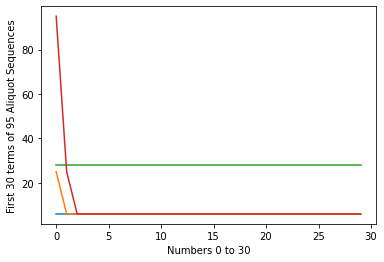

In [58]:
plot_loops(100, 30, 1e9)
print(classify_loops(100, 30, 1e9))

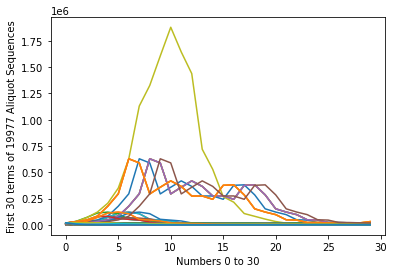

In [59]:
plot_loops(20000, 30)

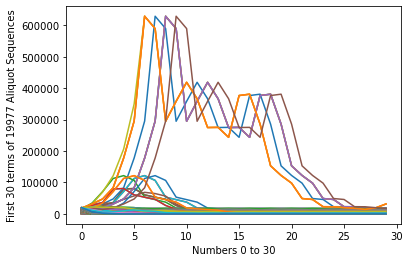

In [60]:
plot_loops(20000, 30, 1e6)

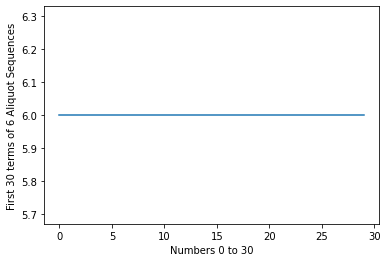

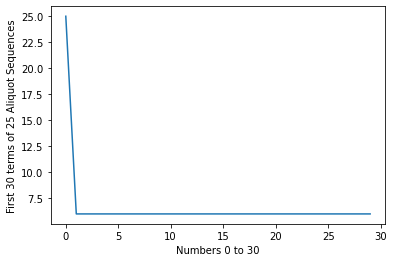

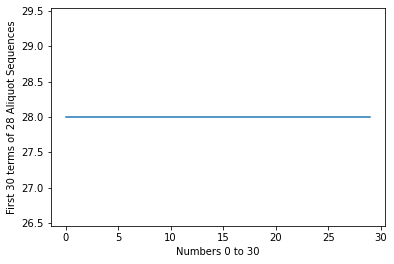

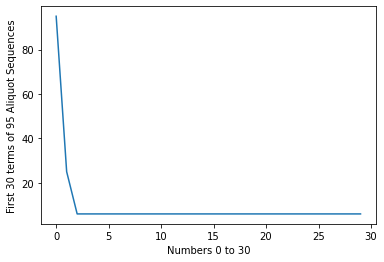

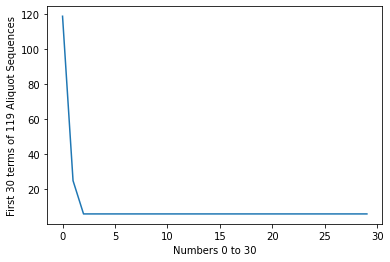

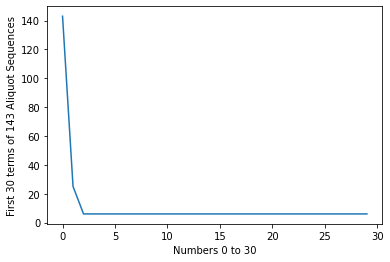

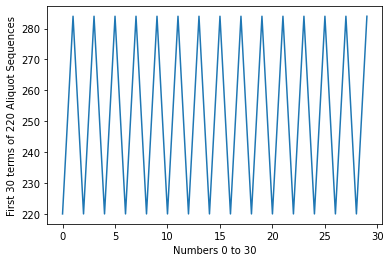

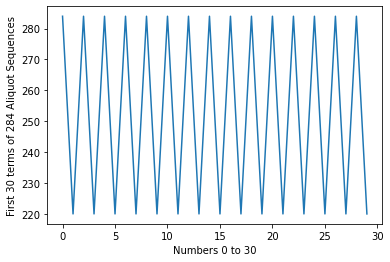

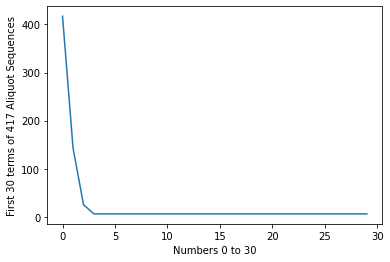

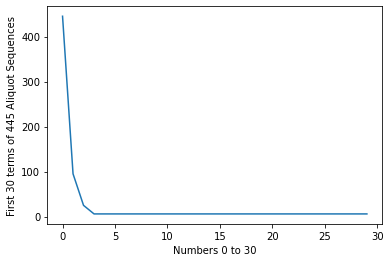

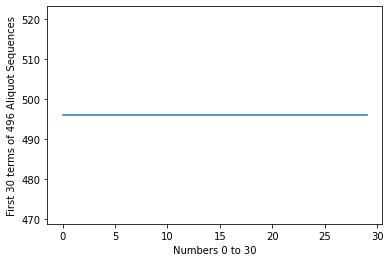

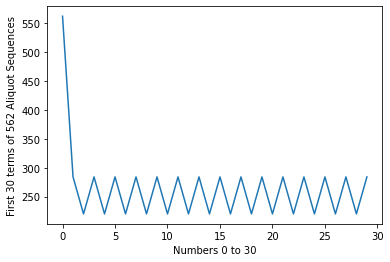

In [61]:
plot_loops_show(563)

Note that graphs that are just a straight line show perfect numbers, graphs that enter a 2 loop show amicable numbers, and graphs that end in a straight line at zero represent sequences that terminate at zero.

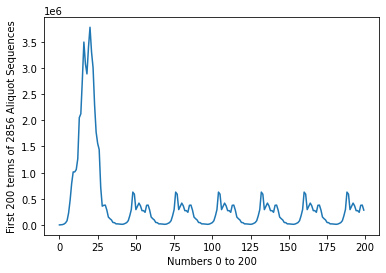

In [62]:
plot_aliq_seq(2856, 200)

The longest loop, found in the question above (for 2856, of length 28).

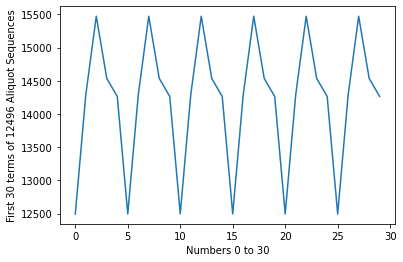

In [63]:
plot_aliq_seq(12496, 30)

#### Observation
Note that this loop has length 5, so there are also odd lengthed loops.

In [64]:
def big_loop_lengths(k, m=30, big=2):
    """
    For the first k numbers, this function returns a list of the numbers whose Aliquot Sequences
    enter a loop (within the first m terms) of length exceeding input big.
    """
    big_loops = []
    for elt in classify_loops(k, m):
        if loop_length(elt) > big:
            big_loops.append(elt)
    return big_loops  # finds loops of longer lengths

In [65]:
def plot_big_loop_lengths(k, m=30, big=2):
    """
    For the first k numbers, this function plots the first m terms of Aliquot Sequences
    that enter a loop (within these first m terms) of length exceeding input big.
    """
    big_loops = big_loop_lengths(k, m, big)
    for elt in big_loops:
        plot_aliq_seq(elt, m)  # plots loops of longer length 

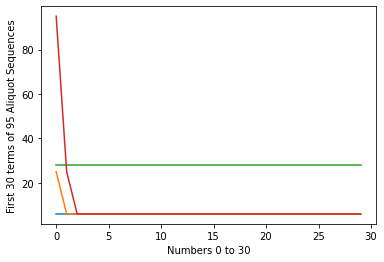

In [66]:
plot_big_loop_lengths(100, 30, 0)

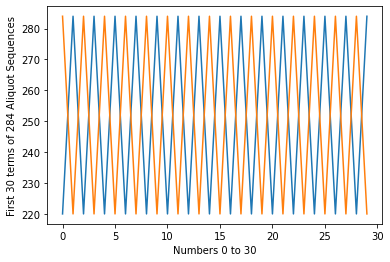

In [67]:
plot_big_loop_lengths(500, 30, 1)

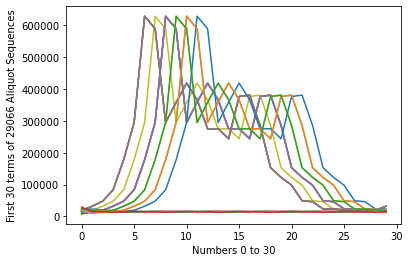

In [68]:
plot_big_loop_lengths(30000)

In [69]:
def plot_terminated(k, m=30, i=1e9):
    """
    For the first k numbers, this function plots the first m terms of Aliquot Sequences
    that terminate at 0 (within these first m terms).
    """
    terminated = classify_terminated(k, m, i)
    for elt in terminated:
        plot_aliq_seq(elt, m, i)  # plots terminating sequences

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100]


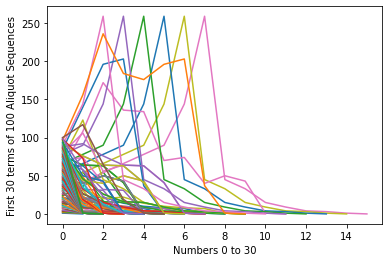

In [70]:
plot_terminated(100)
print(classify_terminated(100))

In [71]:
def plot_exceeded(k, m=30, i=1e9):
    """
    For the first k numbers, this function plots the first m terms of Aliquot Sequences
    that exceed input i within these first m terms.
    """
    exceeded = classify_exceeded(k, m, i)
    for elt in exceeded:
        plot_aliq_seq(elt, m, i)  # plots exceeding sequences

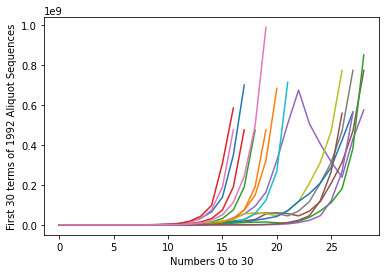

In [72]:
plot_exceeded(2000, 30, 1e9)

In [73]:
def plot_reached_term(k, m=30, i=1e9):
    """
    For the first k numbers, this function plots the first m terms of Aliquot Sequences
    that reached term m without exceeding input i, entering a loop or terminating at 0.
    """
    reached_term = classify_reached_term(k, m, i)
    for j in range(1, len(reached_term)):
        plot_aliq_seq(reached_term[j], m, i)  # plots sequences that reach term m with no clear pattern

[138, 150, 168, 180, 210, 222, 234, 264, 276, 306, 312, 318, 330, 354, 360, 366, 378, 396, 456, 480, 498, 510, 528, 534, 546, 552, 564, 570, 582, 594, 600, 612, 642, 654, 660, 696, 702, 720, 726, 750, 780, 786, 798, 822, 828, 834, 846, 858, 864, 870, 888, 930, 936, 960, 966, 978, 990, 996]


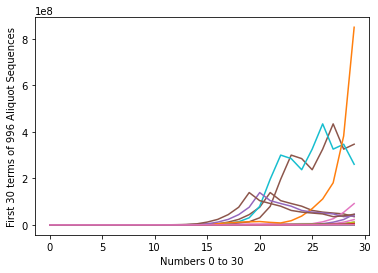

In [74]:
print(classify_reached_term(1000,30,1e9))
plot_reached_term(1000, 30, 1e9)

## Extension 4: Perfect, Amicable, Adbundant and Deficient Numbers <a class="anchor" id="E4"></a>

As stated above, perfect numbers are numbers such that $s(n)=n$, i.e. 6, which has proper divisors 1, 2, 3, and $1+2+3=6$, so $s(6)=6$.

Related to perfect numbers are ‘abundant’ numbers with $s(n) > n$ and ‘deficient’ numbers,
where $s(n) < n$. A looping aliquot sequence should contain some of each. 

We will compare the number of each up to a fixed value n.

Since this question was of great interest to our group, we divided it into 6 parts to carry out further investigations.


#### Part A: Perfect Numbers <a class="anchor" id="perf"></a>
We create functions to determine whether a number is perfect, and to find perfect numbers up to a given k.

In [75]:
def is_perfect(n):
    """
    Given a number n, this function returns True if it a perfect number
    and False if not.
    """
    if s(n)==n:  # checks the definition of perfect numbers
        return True
    return None

In [76]:
def find_perfect_numbers(k):
    """
    For an input k, this function returns a list of the perfect numbers in the first k numbers.
    """
    perfect = []
    for i in range(0, k):
        if is_perfect(i) == True:
            perfect.append(i)
    return perfect 

In [77]:
is_perfect(6)

True

In [78]:
find_perfect_numbers(100)

[6, 28]

In [79]:
s(28)

28

In [80]:
find_perfect_numbers(20000)

[6, 28, 496, 8128]

#### Observation
As we can see, perfect numbers are incredibly scarce. 

From online research, we discovered that every perfect number can be written in the form $2^{p-1}  (2^p - 1)$, where p and $2^p - 1$ are both prime numbers. Therefore, the conditions for perfect numbers are quite specific and rare, giving rise to a very low proportion of them amongst the integers.



#### Part B: Amicable Numbers <a class="anchor" id="amic"></a>
Here, we find 2 ways, of varying efficiencies, to find amicable numbers.

In [81]:
def is_amicable(a,b):
    """
    Given two numbers a and b, this function returns True if they are an 
    amicable pair of numbers and False if not.
    """
    if s(a)==b and s(b)==a and a != b:  # checks the definition of amicable numbers, excluding perfect numbers
        return True
    return None

In [82]:
print(is_amicable(6,6))

None


In [83]:
def find_amicable_numbers(k):
    """
    For an input k, this function returns a list of pairs of amicable numbers in the first k numbers.
    However, it is a very inefficient function because it has a for loop within a for loop,
    and it checks whether i and j are amicable for all numbers, essentially sorting through k^2 numbers.
    """
    amicable = []
    for i in range(1, k):
        for j in range(1, k):
            if is_amicable(i, j) == True:  # finds amicable pairs and perfect numbers
                amicable.append([i,j])
    for elt in amicable:
        if is_perfect(elt[0]) == True:  # removes perfect numbers 
            amicable.remove(elt)
    for elt1 in amicable:
        for elt2 in amicable:
            if sum(elt1) == sum(elt2):  # for pairs with the same sum, they must be the same pair in reverse order
                amicable.remove(elt1)   # so this removes the repeats in descending order
    return amicable

In [84]:
is_amicable(220, 284)

True

In [85]:
find_amicable_numbers(1000)

[[284, 220]]

In [86]:
#find_amicable_numbers(20000)
#Keyboard Interrupt error because has to be stopped/ breaks down the kernel.
#Too slow! We will need to create a more efficient (and amicable ;) ) function.

In [87]:
def efficient_and_amicable(k): #that's me!
    """
    For an input k, this function finds the looping Aliquot Sequences within 
    the first k numbers. Since amicable numbers must enter loops of length 2, it then
    picks such loops. Also, amicable numbers must be the first 2 terms of such length 2 loops,
    so the function checks whether the first and third terms in the sequence are the same. 
    It returns a list of such pairs of numbers and deletes duplicates, as well as the length 
    of this list (the number of amicable pairs within the first k Aliquot Sequences).
    """
    too_amicable = []  # will contain all numbers that enter a loop of length 2
    amicable = []  # will contain only amicable pairs
    loops = classify_loops(k)
    for elt in loops:
        if loop_length(elt) == 2:  # finds all loops of length 2
            too_amicable.append(elt)
    for elt in too_amicable:
        if aliquot_sequence(elt)[0] == aliquot_sequence(elt)[2]:  # checks whether the loops start at the first term,
            amicable.append(sorted([elt, s(elt)]))                # i.e. whether the number is amicable
    for elt in amicable:
        while amicable.count(elt) > 1:  # removes repeats
            amicable.remove(elt)
    length = len(amicable)
    return f"{amicable} \n \n{length}"  # returns amicable pairs and the number of pairs

In [88]:
print(efficient_and_amicable(300))

[[220, 284]] 
 
1


In [89]:
print(efficient_and_amicable(20000))

[[220, 284], [1184, 1210], [2620, 2924], [5020, 5564], [6232, 6368], [10744, 10856], [12285, 14595], [17296, 18416]] 
 
8


In [90]:
print(efficient_and_amicable(1000000))

[[220, 284], [1184, 1210], [2620, 2924], [5020, 5564], [6232, 6368], [10744, 10856], [12285, 14595], [17296, 18416], [66928, 66992], [67095, 71145], [67095, 71145], [63020, 76084], [69615, 87633], [79750, 88730], [122368, 123152], [100485, 124155], [122265, 139815], [141664, 153176], [141664, 153176], [142310, 168730], [171856, 176336], [176272, 180848], [196724, 202444], [185368, 203432], [280540, 365084], [280540, 365084], [308620, 389924], [356408, 399592], [319550, 430402], [437456, 455344], [469028, 486178], [503056, 514736], [522405, 525915], [643336, 652664], [667964, 783556], [600392, 669688], [609928, 686072], [624184, 691256], [635624, 712216], [667964, 783556], [726104, 796696], [802725, 863835], [879712, 901424], [947835, 1125765], [898216, 980984], [998104, 1043096]] 
 
46


In [91]:
print("Time taken to compute find_amicable_numbers(1000):")
%timeit find_amicable_numbers(1000)
print("Time taken to compute efficient_and_amicable(1000):")
%timeit efficient_and_amicable(1000)

Time taken to compute find_amicable_numbers(1000):
188 ms ± 4.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time taken to compute efficient_and_amicable(1000):
3.12 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Observation
The second function is significantly more efficient! Using our understanding of mathematics in this question and finding amicable numbers through loops of length 2 starting at the first term instead of checking all sums of divisors and comparing where they give pairs made the code nearly 70 times more efficient.

Also, note that they are again a quite scarce type of number. We have 5 perfect numbers vs 8 amicable pairs in the first 20000 numbers, so from this we believe there are more amicable than perfect numbers, but not by too much.

From online research, we found that this may be because the set of amicable numbers is a proper subset of the set of sociable numbers, which are also rare due to the specific properties that their divisors that must have (must be cyclical, i.e. their Aliquot Sequences enter loops where the sum of divisors are terms of the sequence, and there are already significantly less loops than integers, so it is not surprising that these are rare, and hence amicable numbers rarer).

#### Part C: Abundant and Deficient Numbers: Ratio Amongst the Integers <a class="anchor" id="abdef"></a>
We will investigate which numbers up to k are abundant or deficient, and their comparison in a ratio.

In [92]:
def is_abundant(n):
    """
    Given a number n, this function returns True if it an abundant number
    and False if not.
    """
    if s(n)=="Undefined":  # ignores n=0
        return False
    elif s(n)>n:  # checks the definition of abundant numbers
        return True
    return False

In [93]:
def find_abundant_numbers(k):
    """
    For an input k, this function returns a list of the abundant numbers in the first k numbers.
    """
    abundant = []
    for j in range(1, k+1):
        if is_abundant(j) == True:
            abundant.append(j)
    return abundant

In [94]:
def is_deficient(n):
    """
    Given a number n, this function returns True if it a deficient number
    and False if not.
    """
    if s(n)=="Undefined":  # ignores n=0
        return False
    elif s(n)<n:  # checks the definition of abundant numbers
        return True
    return False

In [95]:
def find_deficient_numbers(k):
    """
    For an input k, this function returns a list of the deficient numbers in the first k numbers.
    """
    deficient = []
    for j in range(1, k+1):
        if is_deficient(j) == True:
            deficient.append(j)
    return deficient

In [96]:
def compare_ab_and_def(k):
    """
    For an input k, this function compares the amount of abundant and deficient numbers
    within the first k numbers.
    """
    ab_num = len(find_abundant_numbers(k))
    def_num = len(find_deficient_numbers(k))
    return f'Up to k={k}, there are {ab_num} abundant numbers vs {def_num} deficient numbers.'

In [97]:
print(is_deficient(6))

False


In [98]:
compare_ab_and_def(1000)

'Up to k=1000, there are 246 abundant numbers vs 750 deficient numbers.'

In [99]:
compare_ab_and_def(20000)

'Up to k=20000, there are 4953 abundant numbers vs 15042 deficient numbers.'

#### Observation

From testing our function above, we can see there are usually around 3 times as many deficient numbers than abundant ones. This makes sense because of how numbers are constructed- divisors will be smaller than the number itself, and adding numbers gives a smaller (or equal (for 2x2)) result than multiplying them, so on average the sum of divisors is likely to be smaller than the actual number.

Also, as seen above, most numbers terminate at zero, so it is sensible to think that it is a lot more likely that the sum of divisors tends to zero, i.e. there are more deficient numbers.

#### Part D: Abundant and Deficient Numbers: Existence <a class="anchor" id="ex"></a>
We investigate whether all Aliquot Sequences have some abundant and deficient numbers (at least 1 of each), and if not which type of number doesn't.

In [100]:
def exists_abundant(n, m=30, i=1e9):
    """
    Given a number n, this function checks the first mth terms in its aliquot sequence
    to ascertain whether there exists a term that is an abundant number.
    It returns True if it does, and False if not.
    """
    ab_loop = []
    u = aliquot_sequence(n, m, i)
    for j in u:
        if is_abundant(j) == True:
            ab_loop.append(j)  # creates list of abundant terms
    if len(ab_loop) == 0:  # if the length is 0, list is empty, so no abundant terms
        return False
    else:
        return True

In [101]:
exists_abundant(6)

False

In [102]:
exists_abundant(220, 30)

True

In [103]:
def exists_deficient(n, m=30, i=1e9):
    """
    Given a number n, this function checks the first mth terms in its aliquot sequence
    to ascertain whether there exists a term that is a deficient number.
    It returns True if it does, and False if not.
    """
    def_loop = []
    u = aliquot_sequence(n, m, i)
    for j in u:
        if is_deficient(j) == True:
            def_loop.append(j)  # creates list of deficient terms
    if len(def_loop) == 0:  # if the length is 0, list is empty, so no deficient terms
        return False
    else:
        return True

In [104]:
exists_deficient(6)

False

In [105]:
exists_deficient(220, 30)

True

In [106]:
def are_there_ab_and_def(k, m=30, i=1e9, perfect=True):
    """
    Up to the first k numbers, this function finds the looping aliquot sequences 
    and then checks whether all of these contain both abundant and deficient numbers
    within the first m terms.
    If perfect is set to False, the code does not account for perfect numbers or perfect loops
    (since they are less interesting, as perfect numbers have neither abundant nor deficient terms 
    and perfect loops are likely to be entirely deficient until the perfect number).
    """
    count_both=0  # a count for the number of sequences including both abundant and deficient terms
    not_exist_both = 0  # and for those including neither
    not_both = True
    for j in range(1, k+1):
        if perfect == False: 
            if loop_length(j) != 1: # this excludes perfect numbers and perfect loops
                if exists_abundant(j, m, i) and exists_deficient(j, m, i) == True:
                    count_both += 1
                else:
                    not_exist_both +=1
                    not_both = False
        elif perfect == True:
            if exists_abundant(j, m, i) and exists_deficient(j, m, i) == True:
                    count_both += 1  # if True, we don't need to check how many have neither
            else:
                not_exist_both +=1  # but if False, we count them and return a comparison of how many had both
                not_both = False    # and how many had neither
    if not_both == False:
        return False, f"There are {count_both} numbers with some abundant and deficient terms, and {not_exist_both} numbers without both."
    else:
        return True

In [107]:
print(are_there_ab_and_def(2000))
print(are_there_ab_and_def(2000, 30, 1e9, False))

(False, 'There are 966 numbers with some abundant and deficient terms, and 1034 numbers without both.')
(False, 'There are 960 numbers with some abundant and deficient terms, and 1010 numbers without both.')


In [108]:
print(are_there_ab_and_def(200000))
print(are_there_ab_and_def(200000, 30, 1e9, False))

(False, 'There are 90729 numbers with some abundant and deficient terms, and 109271 numbers without both.')
(False, 'There are 90381 numbers with some abundant and deficient terms, and 108173 numbers without both.')


#### Observation

Recall we took perfect numbers to be a subset of looping numbers.

Since it is clear that perfect numbers do not have either abundant or deficient terms, we exclude them from our general investigation. We also exclude numbers with sequences ending in perfect numbers (perfect loops), since those may be only deficient until they reach the perfect number.

When set to False, our function returns similar outputs. From the difference, we can see that around 1 in every 200 numbers is either pefect or enters a perfect loop. Since we know perfect numbers are scarce, this means perfect loops are also scarce but less so. 

As we can see, the test for 200000 outputs False. This means there are not always both some abundant and deficient numbers in Aliquot Sequences, and it is (around 1.2 times) more common.

#### Part E: Abundant and Deficient Numbers: Looping Aliquot Sequences <a class="anchor" id="loop"></a>
Now we investigate the ratio of abundant to deficient numbers within loops of Aliquot Sequences.

In [109]:
print(classify_loops(1000))

[6, 25, 28, 95, 119, 143, 220, 284, 417, 445, 496, 562, 565, 608, 650, 652, 675, 685, 783, 790, 909, 913]


In [110]:
def abundant_loop(n, m=30, i=1e9):
    """
    Given n, this function produces the first m terms of a looping Aliquot Sequence
    and returns only the abundant numbers.
    """
    ab_loop = []
    u = aliquot_sequence(n, m, i)
    if seq_detect_loop(n) == True:  # checks if there is a loop
        for j in u:
            if is_abundant(j) == True:  # checks if there is an abundant term
                ab_loop.append(j)
    return ab_loop

In [111]:
print(abundant_loop(220))
print(aliquot_sequence(220))

[220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220]
[220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284]


In [112]:
def deficient_loop(n, m=30, i=1e9):
    """
    Given n, this function produces the first m terms of a looping Aliquot Sequence
    and returns only the deficient numbers.
    """
    def_loop = []
    u = aliquot_sequence(n, m)
    if seq_detect_loop(n) == True:  # checks if there is a loop
        for j in u:
            if is_deficient(j) == True:  # checks if there is a deficient term
                def_loop.append(j)
    return def_loop

In [113]:
print(deficient_loop(220))
print(aliquot_sequence(220))

[284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284]
[220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284, 220, 284]


In [114]:
def compare_ab_and_def_loop(n, m=30, i=1e9):
    """
    Given n, this function produces the first m terms of a looping Aliquot Sequence
    and returns a comparison of the amount of abundant numbers vs deficient numbers.
    """
    ab_len = len(abundant_loop(n,m,i))
    def_len = len(deficient_loop(n,m,i))
    # compares the lengths of abundant and deficient lists
    return f'There are {ab_len} abundant terms vs {def_len} deficient terms in the first {m} terms of the Aliquot Sequence for {n}.'

In [115]:
compare_ab_and_def_loop(220)

'There are 15 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 220.'

In [116]:
compare_ab_and_def_loop(2856)

'There are 0 abundant terms vs 0 deficient terms in the first 30 terms of the Aliquot Sequence for 2856.'

In [117]:
compare_ab_and_def_loop(12496, 1500)

'There are 600 abundant terms vs 900 deficient terms in the first 1500 terms of the Aliquot Sequence for 12496.'

In [118]:
def compare_many_ab_and_def_loops(k, m=30, i=1e9, big=1):
    """
    For an input k, this function finds the first m terms of the looping Aliquot Sequences
    within the first k numbers with loop lengths exceeding input big.
    It returns a comparison of the amount of abundant numbers vs deficient numbers in each of these sequences.
    """
    big_loops = big_loop_lengths(k, m, big)
    for j in big_loops:
        print(compare_ab_and_def_loop(j,m,i))

In [119]:
compare_many_ab_and_def_loops(1000,30,0)

There are 1 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 220.
There are 0 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 284.
There are 0 abundant terms vs 16 deficient terms in the first 30 terms of the Aliquot Sequence for 562.


In [120]:
compare_many_ab_and_def_loops(10000,30)

There are 15 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 220.
There are 15 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 284.
There are 14 abundant terms vs 16 deficient terms in the first 30 terms of the Aliquot Sequence for 562.
There are 15 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 1064.
There are 15 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 1184.
There are 16 abundant terms vs 14 deficient terms in the first 30 terms of the Aliquot Sequence for 1188.
There are 15 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 1210.
There are 15 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 1308.
There are 15 abundant terms vs 15 deficient terms in the first 30 terms of the Aliquot Sequence for 1336.
There are 15 abundant terms vs 15 deficient terms

In [121]:
def many_loop_lengths(k, m=30, i=1e9):
    """
    This function outputs a list of the lengths of all looping Aliquot Sequences 
    within the first k numbers (and m terms without exceeding i).
    """
    loop_lengths=[]
    loops = classify_loops(k,m,i)
    for j in loops:
        loop_lengths.append(loop_length(j,m,i))
    return loop_lengths

In [122]:
print(many_loop_lengths(20000))

[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 28, 1, 2, 1, 1, 2, 2, 1, 28, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 28, 1, 2, 2, 2, 5, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 5, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 5, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 5, 1, 1, 5, 28, 2, 2, 2, 2, 1, 1, 1, 5, 2, 1, 2,

In [123]:
print(compare_ab_and_def_loop(12496))
print(aliquot_sequence(12496))

There are 12 abundant terms vs 18 deficient terms in the first 30 terms of the Aliquot Sequence for 12496.
[12496, 14288, 15472, 14536, 14264, 12496, 14288, 15472, 14536, 14264, 12496, 14288, 15472, 14536, 14264, 12496, 14288, 15472, 14536, 14264, 12496, 14288, 15472, 14536, 14264, 12496, 14288, 15472, 14536, 14264]


#### Observation

Again, it is of great value to our investigation to take perfect numbers as loops.

When testing for the comparison of abundant to deficient numbers in looping Aliquot Sequences, we drew 2 distinctions.

Firstly, we can see that most looping Aliquot Sequences of even length have a very similar amount of abundant and deficient numbers. This makes sense, since once they enter the loop, they must cycle between a finite number of numbers, out of which half are likely to be abundant and half deficient (because, clearly, not all can be abundant, since the sequence would exceed i, or deficient, since the sequence would terminate at zero). Hence their ratio is nearly a perfect 50/50.
However, for odd length cycles, the opposite happens. In the case of perfect numbers, there will be 0 of each, but for numbers that end in perfect numbers they are likely to have a larger number of deficient numbers, accounting for the first terms, that are likely to decrease until the perfect number is reached and the loop of length 1 entered.
In the case of 12496, we can see the ratio is 40/60. This is because it has a cycle of length 5, out of which 2 are abundant and 3 deficient, giving the exact ratio.
Nonetheless, we can note that, from checking the function many_loop_lengths, most loops are either length 1, which are not as interesting, or even length. Hence, it is still reasonable to claim that looping Aliquot Sequences have a similar number of abundant and deficient terms.

Secondly, when only considering the first m=30, the ratio may not be as close to 50/50, again to account for the first terms until the loop is entered. But for larger m this becomes negligible.

Note that we created a functions, compare_ab_and_def_loop, specific to loops when we could have be created a general function for any Aliquot Sequence (which we do in the next cell). Though these could be combined into just the second function since they do similar things, we were more interested in investigating loops, so we kept both for efficiency when only interested in calling loops.

#### Part F: Abundant and Deficient Numbers: General Aliquot Sequences <a class="anchor" id="gen"></a>
Similar to before, we investigate the ratio of abundant to deficient numbers within Aliquot Sequences, but now they do not have to necessarily enter loops.

In [124]:
def compare_ab_and_def_seq(n, m=30, i=1e9):
    """
    Given n, this function produces the first m terms of Aliquot Sequence
    and returns a comparison of the amount of abundant numbers vs deficient numbers.
    """
    u= aliquot_sequence(n,m,i)
    ab_list=[]
    def_list=[]
    for elt in u:
        if is_abundant(elt) == True:
            ab_list.append(elt)
        elif is_deficient(elt) == True:
            def_list.append(elt)
    # creates lists of abundant and deficient numbers to compare their lengths
    ab_len=len(ab_list)
    def_len=len(def_list)
    print(f'There are {ab_len} abundant terms vs {def_len} deficient terms in the first {m} terms of the Aliquot Sequence for {n}.')
    return ab_len, def_len

In [125]:
print(compare_ab_and_def_seq(52))
print(aliquot_sequence(52))

There are 0 abundant terms vs 8 deficient terms in the first 30 terms of the Aliquot Sequence for 52.
(0, 8)
[52, 46, 26, 16, 15, 9, 4, 3, 1, 0]


In [126]:
def test_compare(n):
    """
    This function produces a comparison of the amount 
    of abundant numbers vs deficient numbers in n random Aliquot Sequences
    (n between 0 and 1000000, randomly generated).
    """
    more_def=0
    more_ab=0
    for j in range(n):
        j=random.randint(0,1000000)  # for random numbers, counts the number of abundant and deficient terms in their sequences
        compare_ab_and_def_seq(j)
        if compare_ab_and_def_seq(j)[0]<compare_ab_and_def_seq(j)[1]:
            more_def += 1
        elif compare_ab_and_def_seq(j)[0]>compare_ab_and_def_seq(j)[1]:
            more_ab += 1
    return f'There are {more_def} with more deficient numbers, and {more_ab} with more abundant numbers.' # returns comparison

In [127]:
test_compare(100)

There are 0 abundant terms vs 1 deficient terms in the first 30 terms of the Aliquot Sequence for 733793.
There are 0 abundant terms vs 1 deficient terms in the first 30 terms of the Aliquot Sequence for 733793.
There are 0 abundant terms vs 1 deficient terms in the first 30 terms of the Aliquot Sequence for 733793.
There are 3 abundant terms vs 22 deficient terms in the first 30 terms of the Aliquot Sequence for 807070.
There are 3 abundant terms vs 22 deficient terms in the first 30 terms of the Aliquot Sequence for 807070.
There are 3 abundant terms vs 22 deficient terms in the first 30 terms of the Aliquot Sequence for 807070.
There are 29 abundant terms vs 1 deficient terms in the first 30 terms of the Aliquot Sequence for 512840.
There are 29 abundant terms vs 1 deficient terms in the first 30 terms of the Aliquot Sequence for 512840.
There are 29 abundant terms vs 1 deficient terms in the first 30 terms of the Aliquot Sequence for 512840.
There are 29 abundant terms vs 1 deficie

'There are 72 with more deficient numbers, and 25 with more abundant numbers.'

#### Observation

Now we see that the ratio of abundant to deficient numbers in Aliquot Sequences is no longer so evenly split- outside of loops, deficient numbers become more common again with approximately a 70/30 ratio. 

## Extension 5: The Preimage <a class="anchor" id="E5"></a>

For a fixed n, we will investigate how large the preimage $s^{−1}({n})$ can be. 

This should tell us something about when aliquot sequences starting at different values merge together.

We could think of 2 ways of doing this:
Either use the memory to count the numbers that appear most in s(n) for the first n numbers, 
or produce the preimages by checking s(j) up until a function of j that ensures we didn't miss any elements in the preimage.

However, using the second method was too time consuming, and finding such a function was very difficult. We include our attempt at the end for the curious reader, but the first method was enough to carry out the question's investigation.

It could also be interesting to study partitions to create a function that gives multiplies the largest possible multiplication of sums to return the largest possible element in a number's preimage.


#### Observation
First off, we can already see that 1 is a very uninteresting number. Its preimage will be infinite, since $\forall$ prime numbers p, $s(p)=1$ by definition, and there are infinitely many prime numbers (by Euclid's Theorem).
Hence, in our function below we introduce a Boolean variable to ignore 1.

In [128]:
def preimage(n, k):
    """
    Given an n, computes its preimage with elements less than or equal to k.
    
    Note that for the purposes of this investigation, 
    choosing a big k is enough, but it would be ideal to find a 
    function of n that tells us what the maximum preimage element can be.
    """
    preim = []
    for j in range(1, k+1):
        if s(j) == n:    
            preim.append(j)
    return preim

In [129]:
def preimage_size(n,k):
    return len(preimage(n,k))

In [130]:
print(preimage(284, 20000))

[220, 562]


In [131]:
print(preimage(1,1000))
print(len(preimage(1, 1000)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
168


In [132]:
print(preimage(2, 100))

[]


#### Observation 
Makes sense that $s^{-1}(2)=\emptyset$ since we have $\forall n \in \mathbb{N}, 1 \in s^{-1}(n)$, so $2-1=1 \implies$ only other divisor would also have to be 1, but $1(1)=1 \neq 2$.

In [133]:
def many_preimages(k, big = 2):
    small_size = []
    bigger = []
    for j in range(1, k+1):
        if preimage_size(j,k)>=big:  # checks preimage size is big
            bigger.append(j)
        else:
            small_size.append(j)
    return f"There are {len(small_size)} with preimages of size 0 or 1, and {len(bigger)} with size {big} or more."

In [134]:
print(many_preimages(100))

There are 83 with preimages of size 0 or 1, and 17 with size 2 or more.


In [135]:
def max_preimage_size(k, which = False, ignore_1 = False):
    """
    Checks, by using the memory, which number appears 
    most commonly in s(k) for the first k numbers.
    If which is set to True, it also tells us which numbers are the most common, 
    i.e. the numbers the maximum count correspond to, and their preimage.
    If ignore_1 is set to True, it does this ignoring 1, since it always have the biggest preimage.
    
    Note: If ignore_1 is set to False, this function basically computes the 
    number of prime numbers in the first k numbers, and can also return a list of them.
    """
    preim_count={0:0} # using a dictionary instead of a list to keep track of the corresponding numbers to the max_count
    for j in range(1, k+1):
        preim_count[j]=len(preimage(j,k))  # appends the sizes of the preimages
    max_count = max(preim_count.values())  # finds the maximum preimage size
    max_keys = [j for j, count in preim_count.items() if count == max_count]  
                                            # finds the corresponding numbers with this size of preimage
    if ignore_1 == True:
        for c in max_keys:
            del preim_count[c]  # removes 1 and its preimage value from the dictionary
        max_count = max(preim_count.values())  # finds new maximum
    if which == True:
        reverse = {count: preim for preim, count in preim_count.items()}  # reverses dictionary to be able to call the key
                                                                          # corresponding to the maximum value
        max_preim = [j for j, count in preim_count.items() if count == max_count]  # finds the number with this max preimage size
        return max_count, max_preim  # returns both the maximum preimage size and the corresponding number
    return max_count  # otherwise, returns only the maximum preimage size 

In [136]:
print(max_preimage_size(100))
print(max_preimage_size(100, True, False))
print(max_preimage_size(100, False, True))
print(max_preimage_size(100, True, True))
print(preimage(21, 100))
print(preimage(40, 100))

25
(25, [1])
3
(3, [21, 40])
[18, 51, 91]
[44, 74, 81]


In [137]:
max_preimage_size(1000, True, True)

(6, [49, 55, 61, 65])

In [138]:
print(aliquot_sequence(49))
preimage(49, 1000)

[49, 8, 7, 1, 0]


[75, 215, 287, 407, 527, 551]

In [139]:
max_preimage_size(20000, True, True)

(20, [211, 241])

In [140]:
print(preimage(211, 20000))
print(preimage(241, 20000))
print(aliquot_sequence(211))
print(aliquot_sequence(241))

[338, 2189, 2561, 3281, 3629, 5249, 5549, 6401, 7181, 7661, 8321, 8909, 9089, 9869, 10001, 10349, 10541, 10961, 11009, 11021]
[399, 1127, 1631, 2519, 2951, 3791, 6119, 8159, 8471, 9071, 10679, 10919, 11591, 12191, 13031, 13439, 14039, 14111, 14279, 14351]
[211, 1, 0]
[241, 1, 0]


Aliquot Sequences merging at 49.


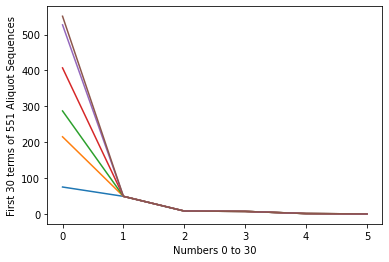

In [141]:
y0 = [75, 215, 287, 407, 527, 551]
print("Aliquot Sequences merging at 49.")
for y in y0:
    plot_aliq_seq(y, m=30, i=1e9)

Aliquot Sequences merging at 49, 55, 61, 65 (preimages of size 6).


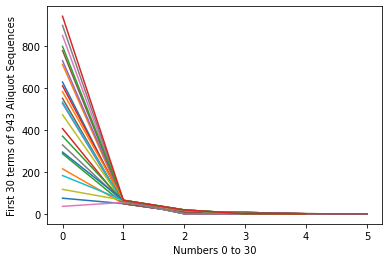

In [142]:
y0 = [49, 55, 61, 65]
print("Aliquot Sequences merging at 49, 55, 61, 65 (preimages of size 6).")
for y in y0:
    preim = preimage(y, 1000)
    for j in preim:
        plot_aliq_seq(j, m=30, i=1e9)

Aliquot Sequences merging at 211.


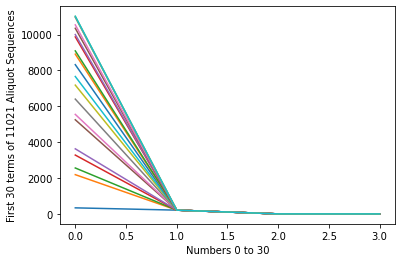

In [143]:
y1 = [338, 2189, 2561, 3281, 3629, 5249, 5549, 6401, 7181, 7661, 8321, 8909, 9089, 9869, 10001, 10349, 10541, 10961, 11009, 11021]
print("Aliquot Sequences merging at 211.")
for y in y1:
    plot_aliq_seq(y, m=30, i=1e9)

Aliquot Sequences merging at 241.


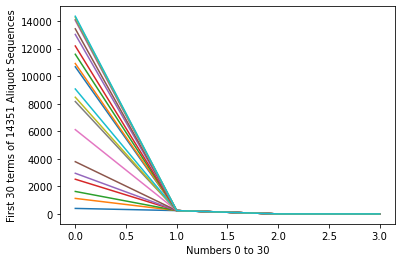

In [144]:
y2 = [399, 1127, 1631, 2519, 2951, 3791, 6119, 8159, 8471, 9071, 10679, 10919, 11591, 12191, 13031, 13439, 14039, 14111, 14279, 14351]
print("Aliquot Sequences merging at 241.")
for y in y2:
    plot_aliq_seq(y, m=30, i=1e9)

In [145]:
print(aliquot_sequence(399))
print(aliquot_sequence(1127))

[399, 241, 1, 0]
[1127, 241, 1, 0]


#### Observation
We can see that the size of the preimage of n, $|s^{-1}(n)|$, grows very slowly as n increases (from a maximum size of 6 $\approx log(1000)$ in the first 1000 numbers to 20 in the first 20000, i.e. $|s^{-1}(n)|$ increased by 3.33 times when n increased by 20, a ratio of 0.167.

From online research, we found that it has been proved that the maximum preimage size up to n is roughly proportional to the logarithm of n, with order of growth of log(n)/log(log(n)) (Erdős and Pomerance, 1986).
It is interesting to see how intricately related the natural log is in number theory, as we can recall that the Prime Number Theory also states the number of prime numbers up to a given N is approximately $N/log(N)$.

Thus, the preimage size of any positive integer n will be very small compared to n's size.

Of course, this is excluding 1, which has an infinitely large preimage.

Therefore, we can conlude that it is very uncommon for Aliquot Sequences to merge (except at 1, and then 0, which explains why so many numbers have Aliquot Sequences terminating at 0). This is because for 2 Aliquot Sequences to merge, they must have an equal term, i.e. a term with a preimage size of 2 or bigger. Such numbers are much less common than those with preimages of size 0 or 1 (as we saw 17 vs 83 in the first 100 numbers).


In [146]:
def preimage_s(n):
    """
    For a given n, this function finds the preimage of s(n).
    """
    preimage = []
    if n == 1:
        for i in range(1, 100):  # for 1, since preimage is infinite, checks elements less than 100
            if s(i) == n:  
                preimage.append(i)
        return preimage
    else:
        for i in range(1, n**2-n):  # the reason behind this range is explained in the observation below
            if s(i) == n:  # checks numbers that give n when function s is applied, i.e. the preimage definition
                preimage.append(i)
        return preimage


In the code above, we check the numbers up until $n^2$ to see whether the sum of their divisors gives our input n.

This is because the sum of a number's divisors is always less than or equal to $2\sqrt n$, so checking $n^2 - n$ (sincen is not a proper divisor) for the inverse seems appropriate to find numbers that fall in the preimage of n. (Except for 1. Then we check the first 100 to check our function with the output above.)

Also, suppose you have a list of the partitions of n. We want to find all the m's such that s(m)=n, and we know one of the partitions will be exactly the divisors of m. 
The sum of pairs of divisors is at most n+1 $\forall n \in \mathbb{N}$, and there can be at most n-1 proper divisors. 
If we multiply each element in the list of partitions by each number up to n-1, we are guaranteed to hit m, and thus we can find the preimage. Since the biggest element in the partitions of n is just the list $[n]$, we can approximate this by giving an upper bound of $n(n-1) = n^2 - n$. This is why we check i  this range above.

In [147]:
print(preimage_s(1))
print(len(preimage_s(1)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
25


In [148]:
preimage_s(220)

[284]

In [149]:
preimage_s(284)

[220, 562, 80089]

In [150]:
s(80089)

284

In [151]:
def preimage_size2(k, preim = False):
    """
    This function finds the largest size of the preimage of s(k) for the first k numbers.
    """
    size = []  # list of sizes to find the maximum
    for i in range(1, k+1):
        size_i = len(preimage_s(i))
        size.append(size_i)
    max_size = max(size)
    max_index = []
    for i in size:
        if i == max_size:
            max_index.append(size.index(i)+1)  # finds the index i, appends i+1 since is the i+1th term
    if preim == False:
        return max_size  # returns only the max size
    if preim == True:
        slist = [s(elt) for elt in max_index]
        preimage_slist = [preimage_s(elt) for elt in max_index]
        return max_size, max_index, slist, preimage_slist  # also returns the max indeces, the function s applied to them, 
                                                           # and the preimages

In [152]:
print(preimage_size2(100))
print(preimage_size2(100, True))

25
(25, [1], ['Undefined'], [[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]])


In [153]:
preimage_s(245)

[723, 1195, 2563, 3859, 9259, 10123, 12283, 14659, 14803]

In [154]:
print(preimage_s(623))

[1857, 3085, 13777, 17197, 30157, 33217, 52621, 57517, 64321, 77677, 79297, 82321, 90637, 91537, 94417, 94957]


In [155]:
print(preimage_s(1079))

[18037, 30421, 48457, 60121, 98677, 103897, 124057, 128917, 138421, 152137, 169417, 173557, 200521, 207577, 210997, 217621, 223957, 241237, 258121, 271477, 276121, 278857, 284437, 286921, 288217, 289621, 290197]


In [156]:
# preimage_size(10000, True) code runs too slowly

In [157]:
print("Time taken to compute max_preimage_size(100):")
%timeit max_preimage_size(100)
print("Time taken to compute preimage_size2(100):")
%timeit preimage_size2(100)

Time taken to compute max_preimage_size(100):
1.07 ms ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Time taken to compute preimage_size2(100):
46.4 ms ± 729 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Observation

As we can see, our second method and function is about 40 times slower. However, it is more exhaustive and accurate: 
It is slow because it checks too many numbers, but note that it did include 80089 in the preimage of 284, whereas our first function didn't.

In [158]:
def primes(k):
    prime_list = []
    for j in range(1, k+1):
        if isprime_basic(j) == True:
            prime_list.append(j)
    return prime_list

In [159]:
print(primes(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [160]:
print("Time taken to compute primes(100):")
%timeit primes(100)
print("Time taken to compute preimage(1,100):")
%timeit preimage(1,100)

Time taken to compute primes(100):
27.2 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Time taken to compute preimage(1,100):
12 µs ± 306 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Observation
Our function is 2 times more effiecient than isprime_basic! Even though computing primes in this way is not at all efficient, and our function was only faster due to the advantage of using the memory (when most prime functions use it too), it is still a cool result of our investigation.

# Conclusion: <a class="anchor" id="conc"></a>
Through the use of the memory, dynamic programming and mathematics, we managed to create functions to answer each question that run pretty efficiently. 
Our main observations were the following:

· A vast majority of Aliquot Sequences terminate at 0, due to how numbers are constructed.

· Loops do not tend to have very long lengths (the longest one we found had length 28, for 2856, 7524, 275444, etc).

· Terminating sequences can be quite long relative to the starting n (the longest one we found had length 72, for 1148).

· Perfect numbers are very scarce, with only 4 in the first 20,000, and amicable numbers are also scarce but less so, with only 46 pairs in the first 1,000,000 numbers.

· While the ratio is nearly 50/50 for looping sequences of even length, other loops and general sequences, as well as the integers themselves, show a preference for deficient numbers. Again, this is because of how numbers are constructed.

· The size of the preimage grows very slowly as n increases (with order log(n)/log(log(n))). This means that not many Aliquot Sequences starting at different values merge together. 

· Aliquot Sequences are fun! Thank you for marking :)

#### More Developed Conclusions

For the interested reader:

##### Why are there more deficient numbers?

One reason there are more deficient numbers than any other type in Aliquot Sequences is because of how many prime numbers exist, particularly in the early integers. This is of course influential as the sum of proper divisors of a prime number is just 1. As mentioned, this is mainly a contributing factor when looking at Aliquot sequences that start at smaller numbers (for example between 1 and 500). This is because the proportion of prime numbers inevitably gets smaller as you increase the range in which you are looking for them. To show this, by tallying up the prime numbers between 1 and 500, we get that there are 95 of them. This is 19% of 500, therefore almost one-fifth of the numbers up to 500 are deficient without even considering other cases of numbers.

The more general reason why there are more deficient numbers in Aliquot sequences, which encases the argument above, is that it is less common for a number to have large enough factors to be abundant or even perfect. An abundant number would need to be divisible by a high enough proportion of numbers between 2 and 10 to get large enough proper divisors. For example, 360 is divisible by 2, 3, 4, 5, 6, 8, and 10 so is comfortably an abundant number. However, this is quite rare, if we consider numbers that are divisible by 2 and 3, so very likely to be abundant, we see that this is one in every 6 numbers and so a significant minority.




##### Why are there a similar number of Abundant and Deficient numbers in a looping Aliquot sequence?

The reason there is a similar number of Abundant and Deficient numbers in a looping Aliquot sequence is simply because the sequence must return to the number at the start of the loop. This is much clearer through an example. Suppose you have a loop of length n that starts at a number $x_1$. There are 3 cases:

1) If x is a perfect number, then the loop is of length n = 1 and the number of abundant and deficient numbers are both equal to 0.

2) If x is a deficient number, then the next term in the sequence $x_2 < x_1$ and so we will need the sequence to increase again to return to $x_1$. Thus somewhere along the next n-1 terms we will require a term in the sequence will have the property that $x_i+1 > x_i$, for some $i = 2, 3, … , n$. This implies that this $x_i$ is an abundant number. This does not guarantee that the number of abundant and deficient numbers will be equal, but they will certainly be similar.

3) If x is an abundant number, then the next term in the sequence $x_2 > x_1$ and using the same reasoning as in 2), we require that some $x_i$, for $i = 2, 3, … , n$ is a deficient number. This again creates a similar number of abundant and deficient numbers in our looping Aliquot sequence.
 